In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [65]:
df = pd.read_csv('diabetes.csv')

In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
df['Insulin']= np.where(df['Insulin']==0,df['Insulin'].mean(),df['Insulin'])

In [68]:
df['Insulin']

0       79.799479
1       79.799479
2       79.799479
3       94.000000
4      168.000000
          ...    
763    180.000000
764     79.799479
765    112.000000
766     79.799479
767     79.799479
Name: Insulin, Length: 768, dtype: float64

In [69]:
df['BMI'] = df['BMI'].replace(0 , df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [ ]:
d= ProfileReport(df)
d.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [70]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

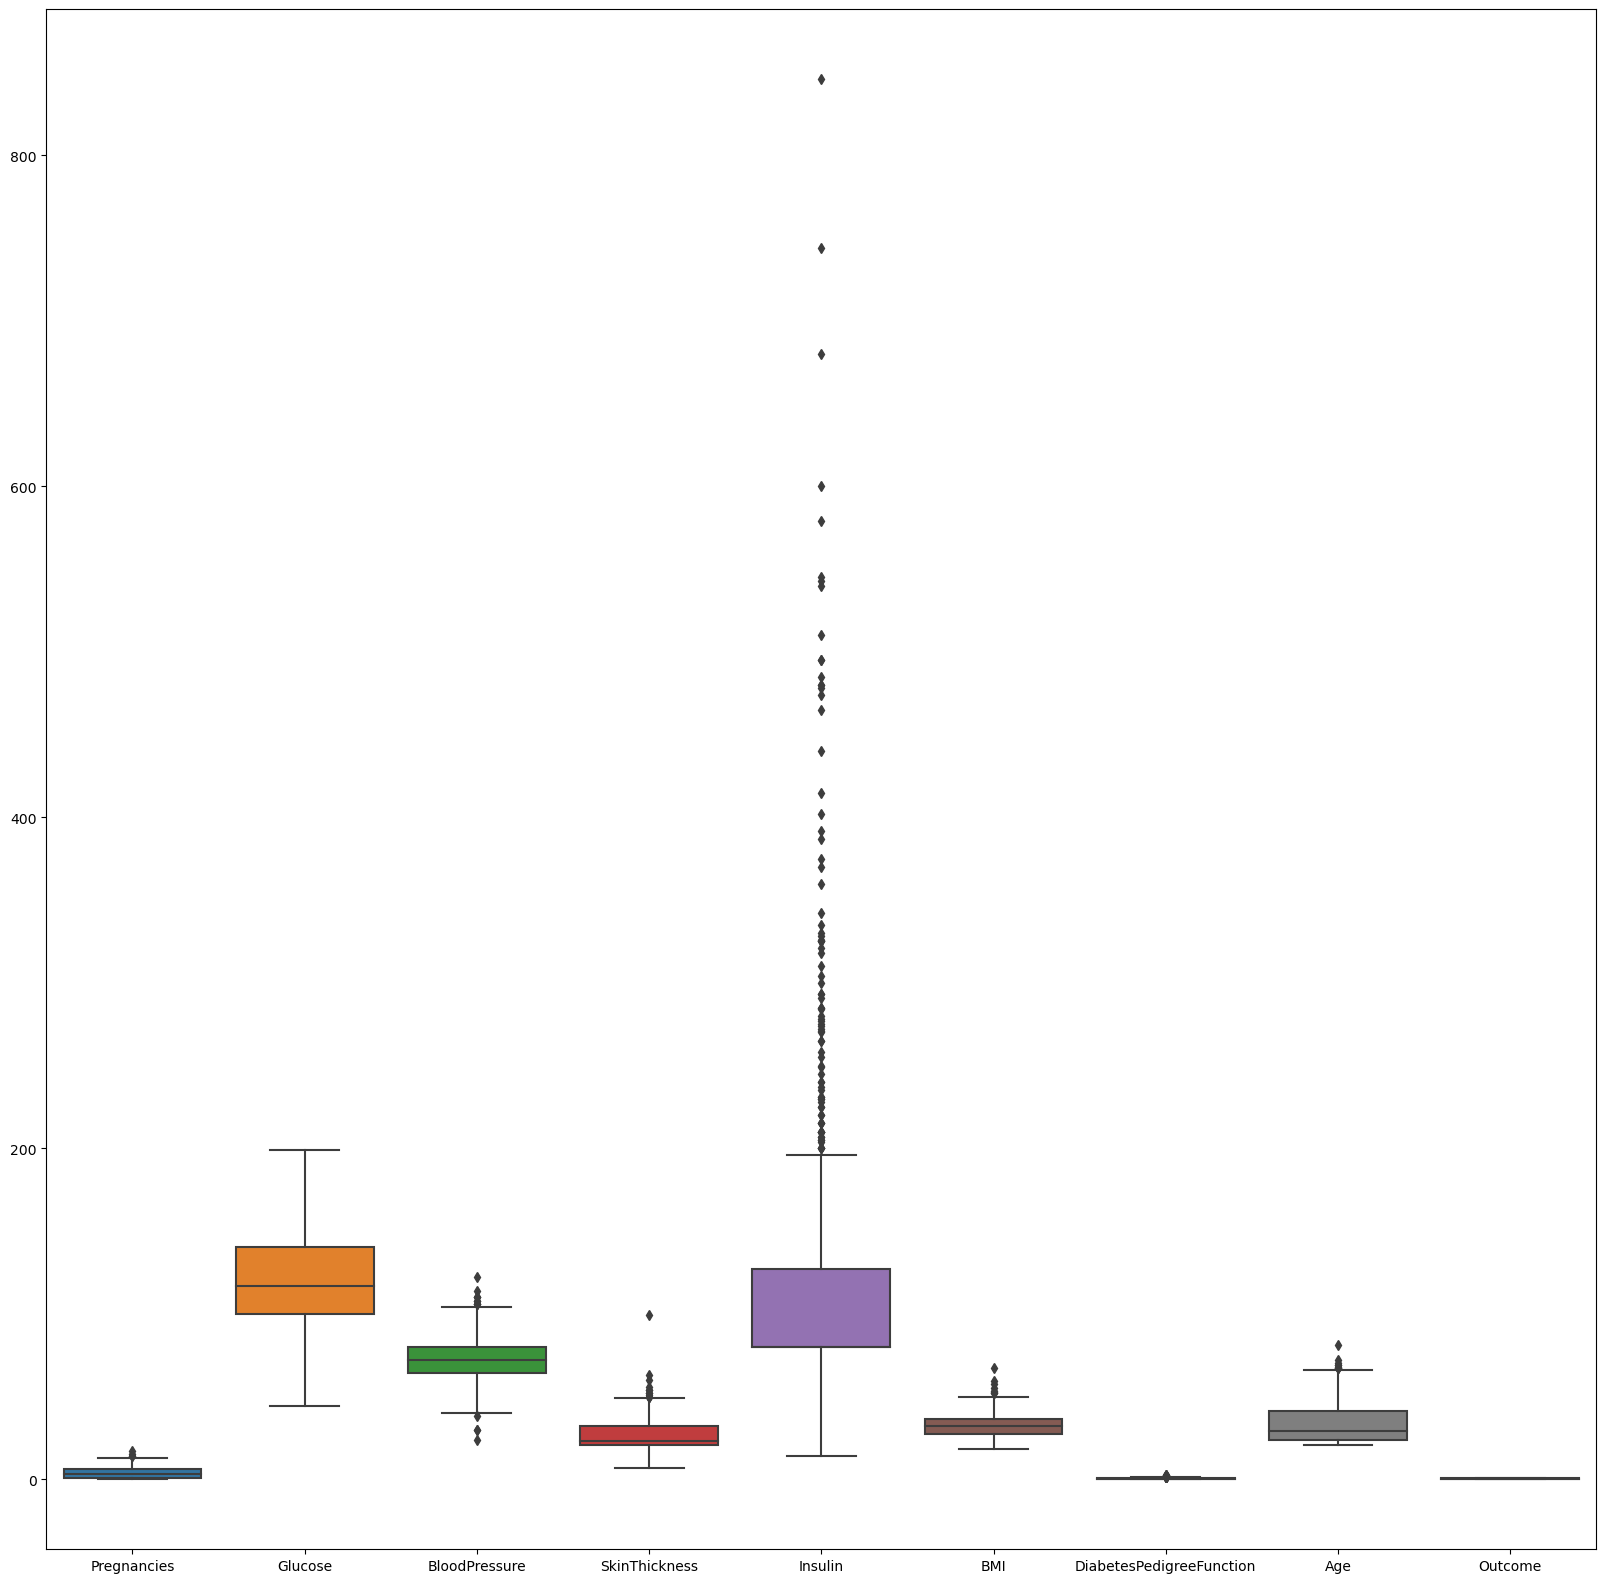

In [72]:
fig ,ax= plt.subplots(figsize=(20,20))
sns.boxplot(data=df, ax=ax)

<AxesSubplot:>

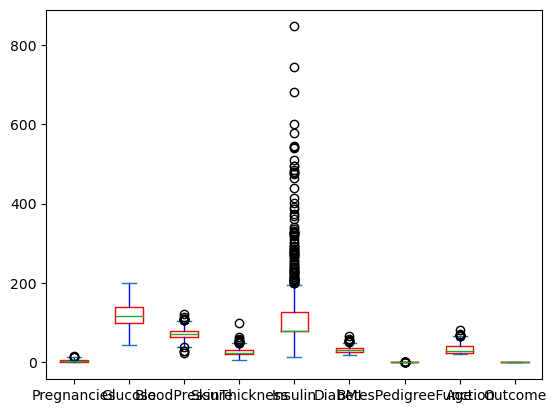

In [73]:
df.plot(kind='box',color={'boxes':'r','whiskers':'b'})

In [74]:
q=df['Insulin'].quantile(.70)
df_new= df[df['Insulin']<q]

<AxesSubplot:>

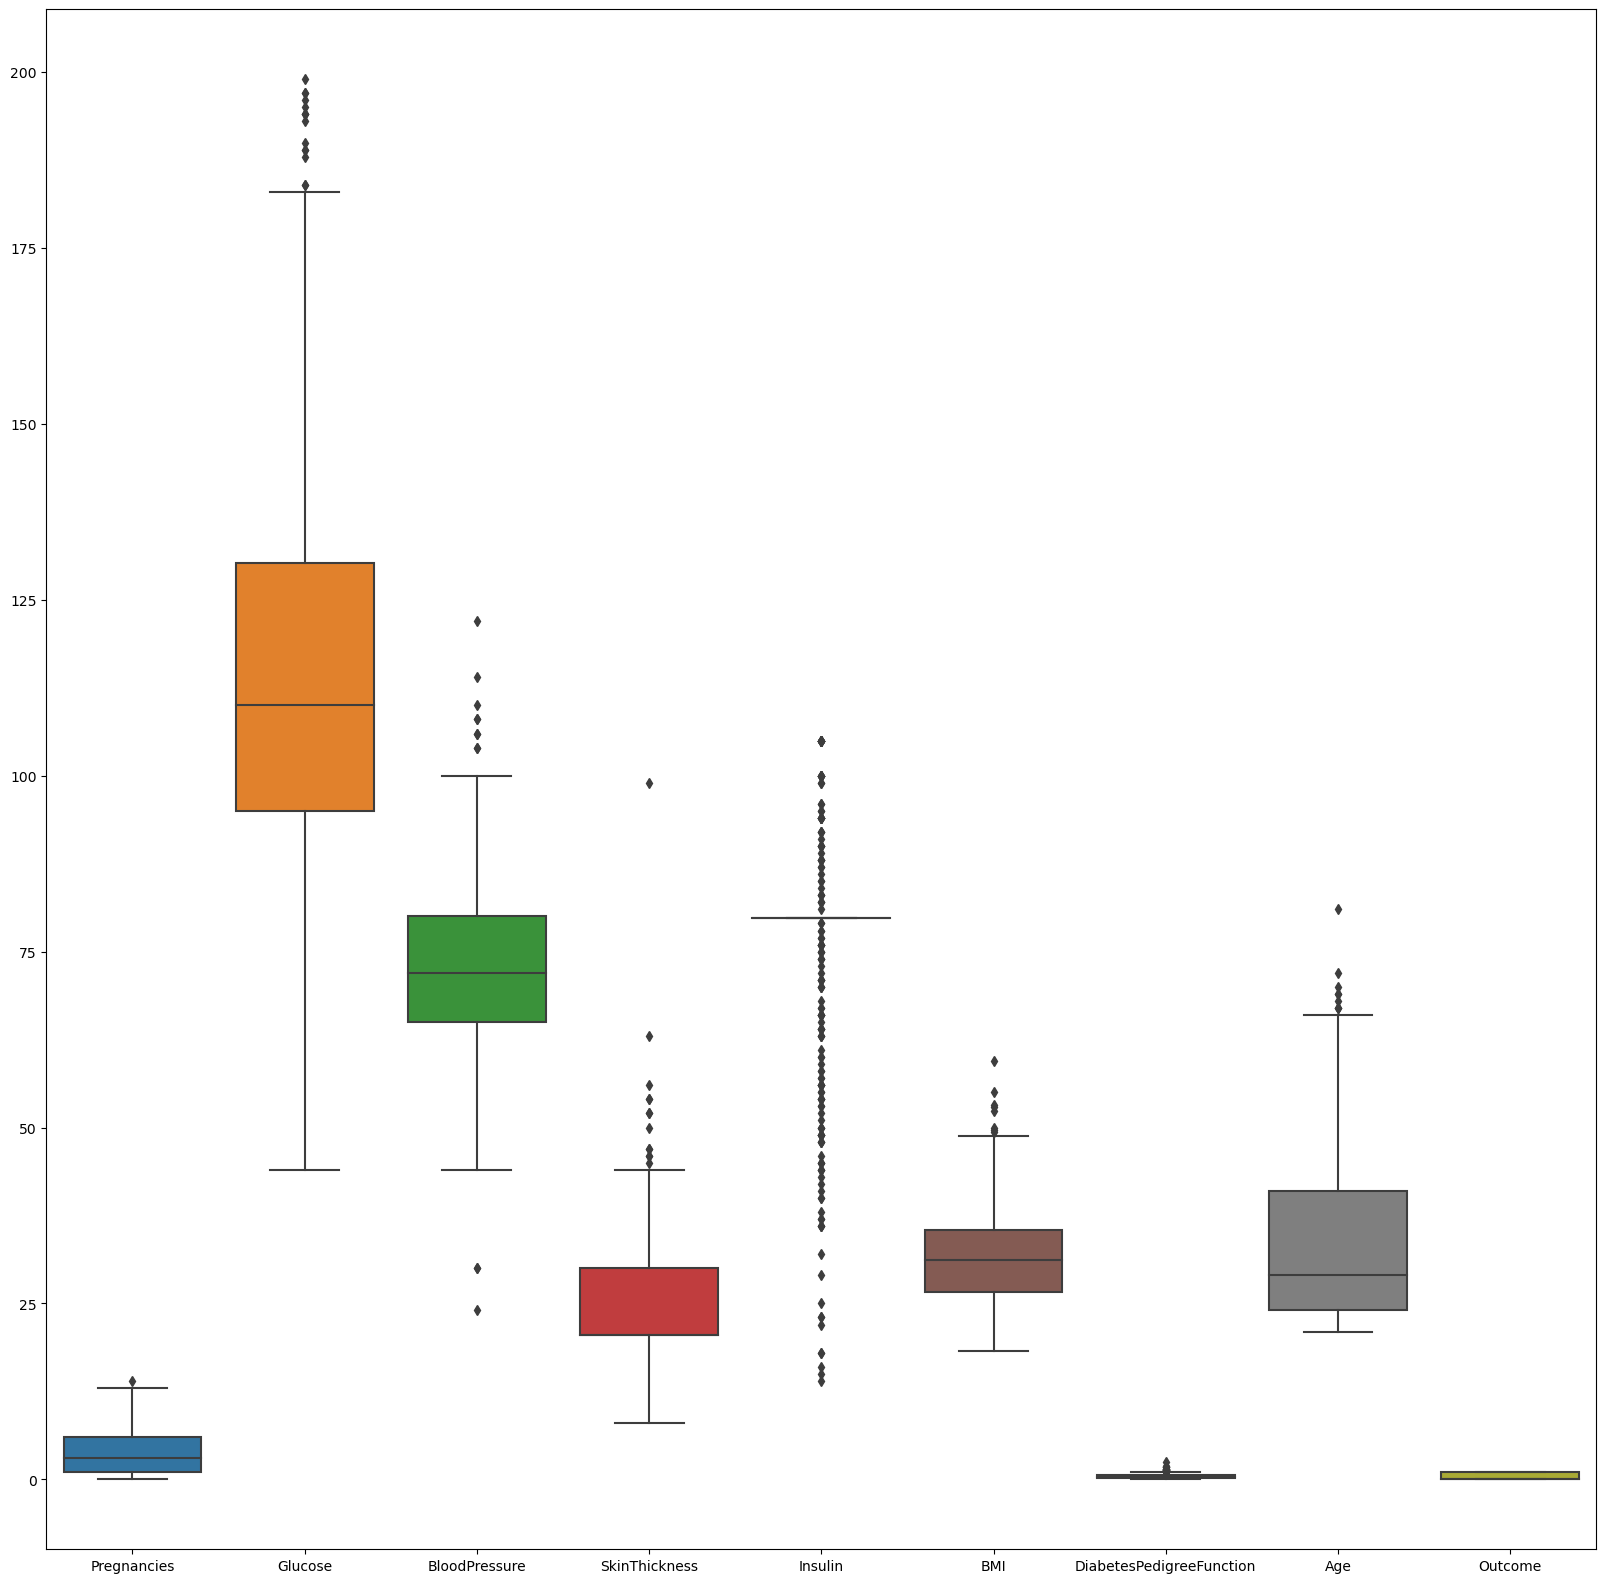

In [75]:
fig ,ax= plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [76]:
q = df['Pregnancies'].quantile(.98)
df_new = df[df['Pregnancies'] < q]

q = df_new['BMI'].quantile(.99)
df_new = df_new[df_new['BMI']< q]

q = df_new['SkinThickness'].quantile(.99)
df_new = df_new[df_new['SkinThickness']< q]

q = df_new['Insulin'].quantile(.95)
df_new = df_new[df_new['Insulin']< q]

q = df_new['DiabetesPedigreeFunction'].quantile(.99)
df_new = df_new[df_new['DiabetesPedigreeFunction']< q]


q = df_new['Age'].quantile(.99)
df_new = df_new[df_new['Age']< q]

<AxesSubplot:>

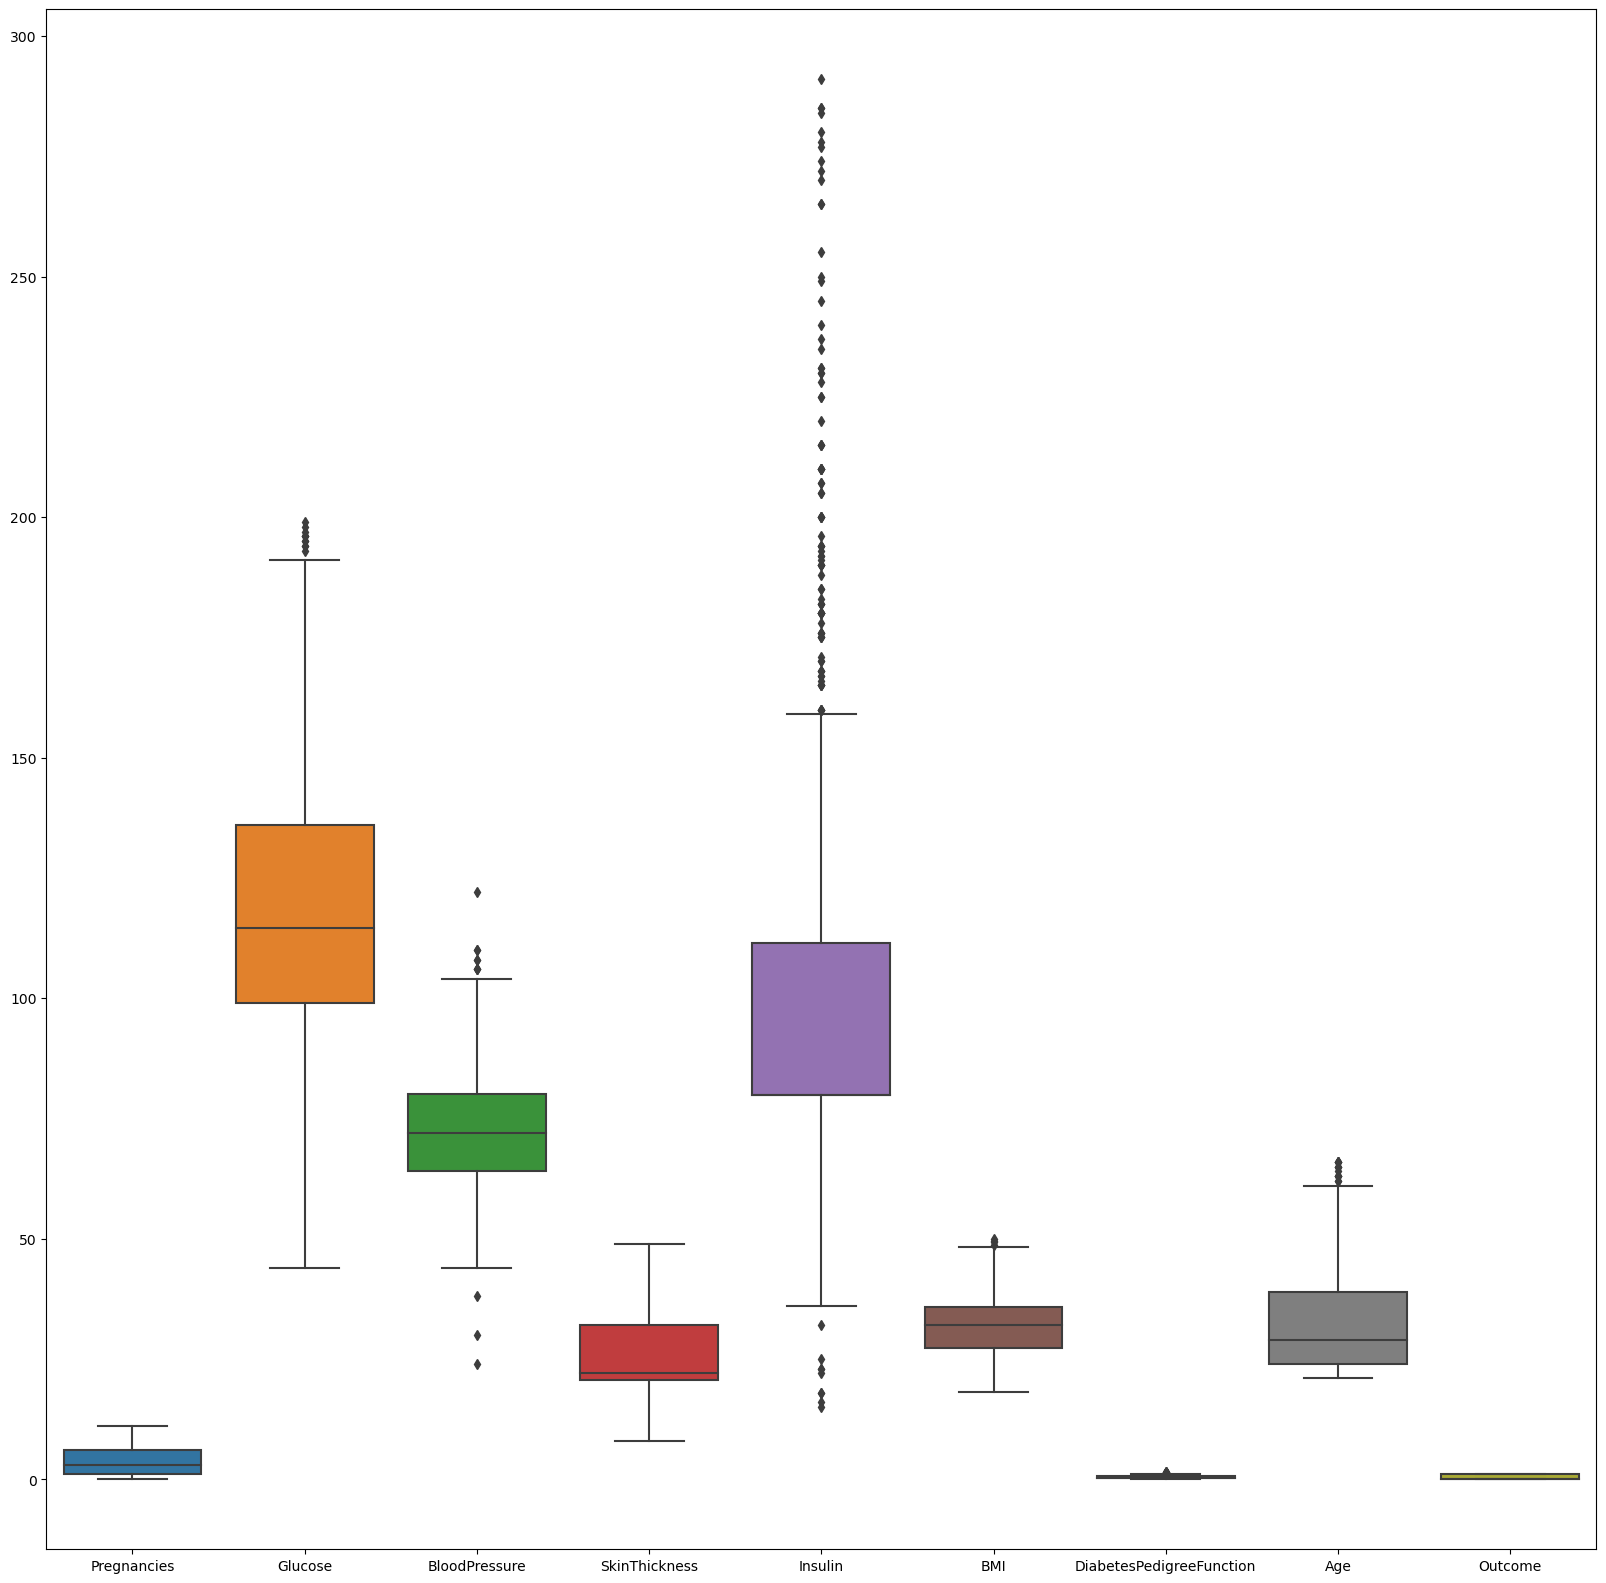

In [77]:
fig ,ax= plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [78]:
df_new.shape

(674, 9)

In [79]:
df_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,3.602374,119.217318,71.994622,25.721354,101.061453,31.904204,0.447338,32.454006,0.327893
std,3.011478,29.272890,11.891728,8.507237,49.005425,6.384238,0.285170,10.964692,0.469794
min,0.000000,44.000000,24.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.300000,0.238000,24.000000,0.000000
50%,3.000000,114.500000,72.000000,22.000000,79.799479,31.992578,0.356000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,111.500000,35.800000,0.600000,39.000000,1.000000
max,11.000000,199.000000,122.000000,49.000000,291.000000,50.000000,1.476000,66.000000,1.000000


In [80]:
def outlier_removal( col ):
    q3,q1= np.nanpercentile(df_new[col],[75,25])
    iqr= q3-q1
    ul= q3 + (1.5 * iqr)
    ll= q1 - (1.5 * iqr)
    return ul , ll

for i in df_new.columns:
    ul,ll= outlier_removal(i)
    df_new[i]= np.where( (df_new[i]< ll) | (df_new[i]>ul) , np.nan , df_new[i])
    


In [81]:
df_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,674.000000,663.000000,663.000000,674.000000,572.000000,670.000000,649.000000,660.000000,674.000000
mean,3.602374,117.947923,71.729072,25.721354,85.399334,31.799602,0.415106,31.780303,0.327893
std,3.011478,27.788669,10.886009,8.507237,22.552781,6.257367,0.236653,10.042334,0.469794
min,0.000000,44.000000,44.000000,8.000000,36.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.300000,0.237000,24.000000,0.000000
50%,3.000000,114.000000,70.000000,22.000000,79.799479,31.992578,0.343000,28.000000,0.000000
75%,6.000000,134.000000,78.000000,32.000000,79.799479,35.800000,0.564000,38.000000,1.000000
max,11.000000,191.000000,104.000000,49.000000,159.000000,48.300000,1.138000,61.000000,1.000000


<AxesSubplot:>

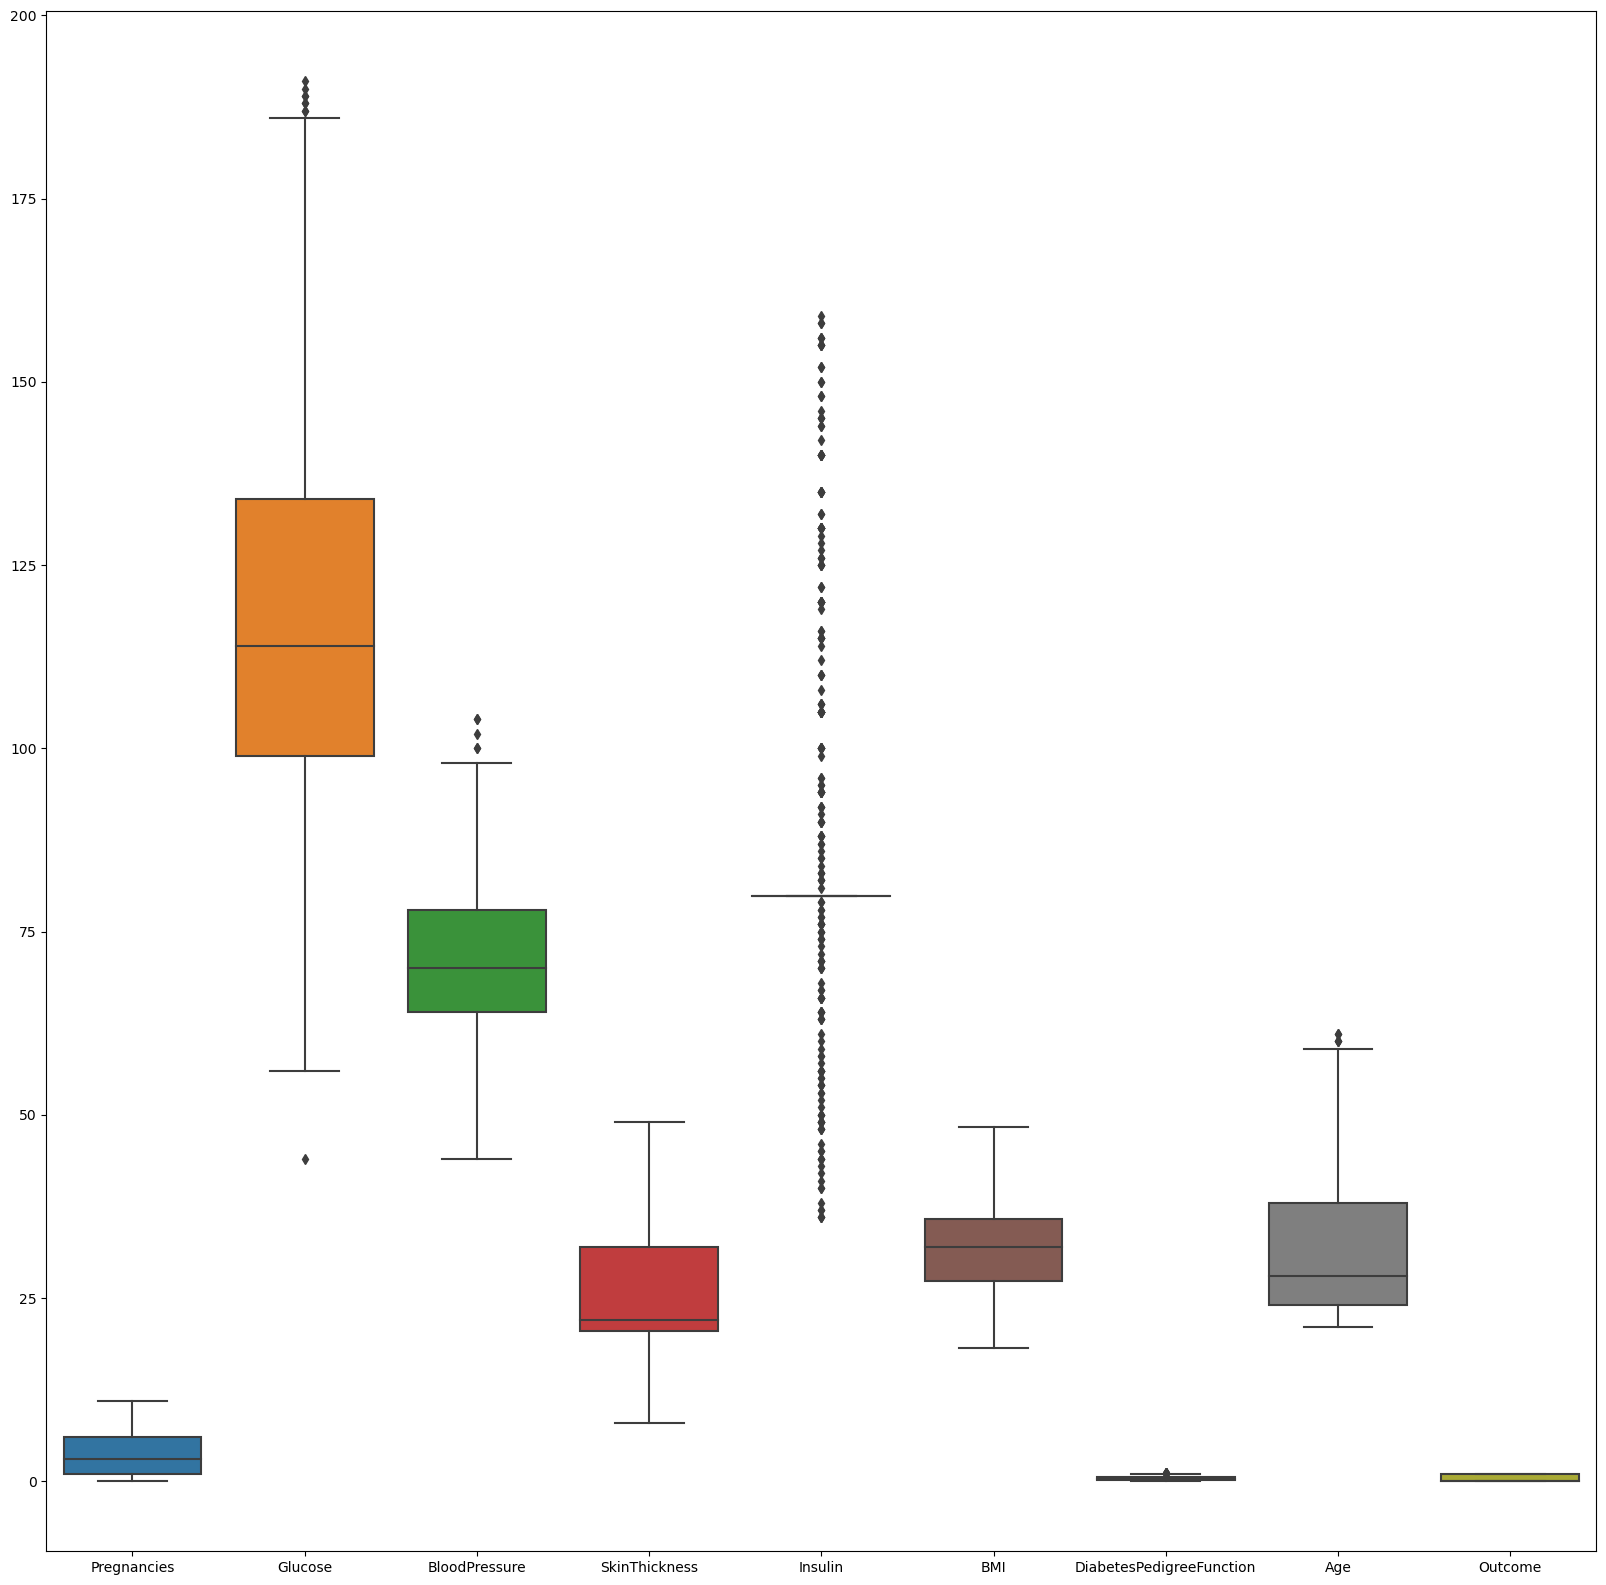

In [82]:
fig ,ax= plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [87]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.000000,1.0
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31.000000,0.0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32.000000,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.000000,0.0
5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30.000000,0.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,85.399334,32.9,0.171,31.780303,0.0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27.000000,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.000000,0.0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47.000000,1.0


In [88]:
df_new['Glucose']= np.where(df_new['Glucose'].isnull() , df_new['Glucose'].mean() , df_new['Glucose'])

In [89]:
df_new['BloodPressure']= np.where(df_new['BloodPressure'].isnull() , df_new['BloodPressure'].mean() , df_new['BloodPressure'])

In [90]:
df_new['Insulin']= np.where(df_new['Insulin'].isnull() , df_new['Insulin'].mean() , df_new['Insulin'])

In [91]:
df_new['BMI']= np.where(df_new['BMI'].isnull() , df_new['BMI'].mean() , df_new['BMI'])

In [92]:
df_new['DiabetesPedigreeFunction']= np.where(df_new['DiabetesPedigreeFunction'].isnull(), df_new['DiabetesPedigreeFunction'].mean() , df_new['DiabetesPedigreeFunction'])

In [93]:
df_new['BloodPressure'].isnull().sum()

0

In [94]:
df_new['Age']= np.where(df_new['Age'].isnull()>0 , df_new['Age'].mean() , df_new['Age'])

In [95]:
y= df_new['Outcome']

In [96]:
x= df_new.drop('Outcome', axis=1)

In [97]:
df_new.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.000000,85.399334,32.9,0.171,31.780303,0.0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27.000000,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.000000,0.0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47.000000,1.0
767,1.0,93.0,70.0,31.000000,79.799479,30.4,0.315,23.000000,0.0


In [98]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.000000
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31.000000
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32.000000
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.000000
5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30.000000
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,85.399334,32.9,0.171,31.780303
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27.000000
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.000000
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47.000000


In [99]:
scalar = StandardScaler()
arr= scalar.fit_transform(x)
arr

array([[ 0.79675391,  1.09120843,  0.02511224, ...,  0.28879778,
         0.91316384,  1.8348211 ],
       [-0.86479354, -1.19635825, -0.53102695, ..., -0.83405629,
        -0.2762686 , -0.0785807 ],
       [ 1.46137289,  2.3620788 , -0.71640669, ..., -1.36340178,
         1.10709304,  0.02212466],
       ...,
       [ 0.46444442,  0.11082271,  0.02511224, ..., -0.89821938,
        -0.73307961, -0.17928605],
       [-0.86479354,  0.29237562, -1.08716615, ..., -0.27262926,
        -0.28488768,  1.53270503],
       [-0.86479354, -0.90587359, -0.16026749, ..., -0.22450694,
        -0.43141196, -0.88422356]])

In [100]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [101]:
arr.shape

(674, 8)

In [102]:
arr.shape[1]

8

In [103]:
for i in range(arr.shape[1]):
    print(variance_inflation_factor(arr,i))

1.5453018573815989
1.2045487322520756
1.2412162470319235
1.4021838346631155
1.1099357705828912
1.4851267543485638
1.0240312165038008
1.7558570881177729


In [104]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = .20 , random_state = 144)

In [108]:
logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [109]:
logr_liblinear.fit(x_train,y_train )

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [112]:
logr = LogisticRegression(verbose=1)

In [113]:
logr.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [114]:
y_pred_liblinear = logr_liblinear.predict(x_test)
y_pred_liblinear

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [115]:
y_pred_default = logr.predict(x_test)

In [116]:
confusion_matrix(y_test,y_pred_liblinear)

array([[75, 12],
       [29, 19]], dtype=int64)

In [117]:
confusion_matrix(y_test, y_pred_default)

array([[76, 11],
       [25, 23]], dtype=int64)

In [123]:
def model_eval( y_test , y_pred):
    tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy= (tp+tn) / (tp+tn+fp+fn)
    recall= tp/(tp+fn)
    precision = tp/(tp+fp)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'F1':F1_Score}
    return result
model_eval(y_test,y_pred_liblinear)
    

{'Accuracy': 0.6962962962962963,
 'Precision': 0.6129032258064516,
 'Recall': 0.3958333333333333,
 'F1': 0.4810126582278481}

In [124]:
auc = roc_auc_score(y_test,y_pred_liblinear)
roc_auc_score(y_test,y_pred_default)

0.6763649425287357

In [125]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_liblinear)

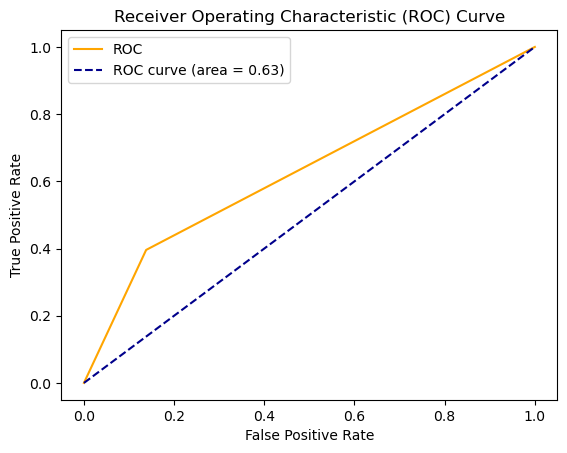

In [126]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()